![image](https://cdn.statically.io/img/www.mikegingerich.com/f=auto/wp-content/uploads/2019/09/Instant-Website-Traffic-9-Proven-Ways-to-Increase-Traffic-to-Your-Website-e1567528773528.jpg)

# Introduction

### Website traffic refers to web users who visit a website. Web traffic is measured in visits, sometimes called "sessions," and is a common way to measure an online business effectiveness at attracting an audience.

### For measuring web traffic to check the well liked of websites, or any specific web pages of that website. Whenever any user visits the webpage a page visit is generated and any user if connected to internet will always visit at least one page and could visits many more if stays connected. For monitoring web traffic need information like total count of visitors, mean page views per visitor, the most famous pages, average visits of visitors and Page duration, etc. are the features commonly used in web traffic prediction. 

### We will deep dive into the web traffic data set and look at how we can use LSTM to solve this time series forecasting problem.

### We will work with the web traffic dataset. It is a six-month series data set the link is given [here](https://www.kaggle.com/datasets/kajal1/web-traffic-forecast-dataset)


# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import *
from keras.layers import *
from keras.callbacks import *

# Importing the Data Set

In [2]:
data = pd.read_csv("../input/web-traffic-forecast-dataset/webtraffic.csv")

# Data Exploration

In [3]:
data.shape

(4896, 2)

In [4]:
data.head()

,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737


In [5]:
sessions = data['Sessions'].values

# Visualize the whole dataset

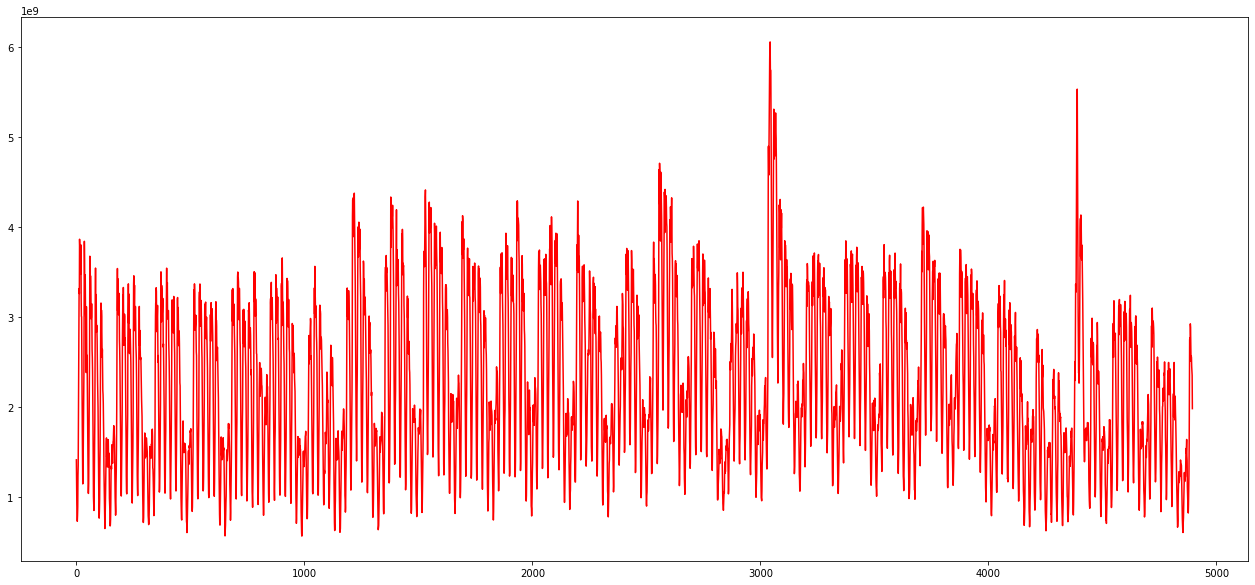

In [6]:
ar = np.arange(len(sessions))
plt.figure(figsize = (22,10))
plt.plot(ar, sessions, 'r')
plt.show()

### Each point of this curve is an early session count and you can see there are some repeating patterns throughout the time series
### The traffic volume comes down, after almost equal intervals of time. Apart from that, there are a couple of spikes as well in the traffic, In this plot.

## First week web trafic

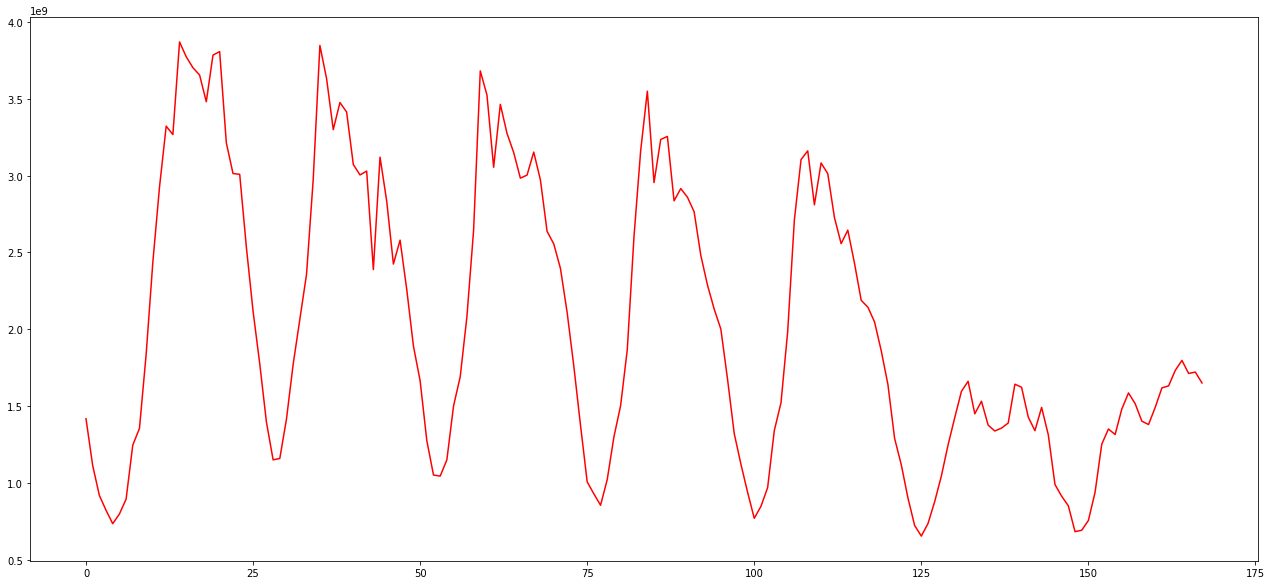

In [7]:
sample = sessions[:168]
ar = np.arange(len(sample))
plt.figure(figsize = (22,10))
plt.plot(ar, sample, 'r')
plt.show()

### Here we are plotting the first week’s data only, now the repeating pattern can be seen more clearly, and these dips in the plot in web traffic are may be occurring once every 24 hours. So clearly there are two instances of time in a day, when we have a huge traffic volume, like during a few times and when we have a modest level of traffic on the website. As in here, I will help you to explore this data as much as possible, before getting started with model building.

# Data preparation

### Moving on now let’s prepare the data for model training, here we will create input sequences, from the block traffic data. Let’s say this is a time series. Each cell would have some number or value. Let’s create sequences of length five, so the first five observations, will form the first sequence, and the sixth observation, this one will be treated as the target.

### The second sequence will start from the second element, till the sixth element and the target will be the seventh element.

In [8]:
def prepare_data(seq, num):
    x = []
    y = []
    for i in range(0, (len(seq)- num), 1):
        input_ = seq[i:i+num]
        output = seq[i+num]
        
        x.append(input_)
        y.append(output)
    
    return np.array(x), np.array(y)


In [9]:
num = 168
x,y = prepare_data(sessions, num)
print(len(x))

4728


### Now here we are calling this function to create sequences. The sequence length we have specified is 168 hours and that is equivalent to one week. So we are creating sequences of one week, as our input sequences. Now the number of sequences are well over 4700.

# Split the dataset

### Next we will split the dataset into train and test set. and we will do this in a rstio of 9:1
### 

In [10]:
ind = int(0.9*len(x))

# prepare training and test data
X_train = x[:ind]
y_train = y[:ind]

X_test = x[ind:]
y_test = y[ind:]

# scaling

### nowhere in the code we would scale the data, Both the input sequences and the target values, will be scaled because of scaling the data, speeds because of scaling the data, speeds of the model training process.

In [11]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.fit_transform(X_test)

In [12]:
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [13]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)[:, 0]
y_test = y_scaler.fit_transform(y_test)[:, 0]

### After that, we are reshaping the data from two dimensional to 3 dimensional.

In [14]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape)

(4255, 168, 1)


# Model building for web traffic forecasting

In [15]:
model = Sequential()
model.add(LSTM(128, input_shape = (168,1)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

2022-06-18 13:06:06.799229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 13:06:06.910539: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 13:06:06.911567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 13:06:06.913628: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

### Have a look at the activation at the final layer above the code It is linear. This is because we have to predict a continuous value and not some class tag or category as it is a regression problem and not a classification problem. Other than that we are using a single layer of LSTM here and the input shape is 168 that is one week.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss = 'mse', optimizer = 'adam')
mc = ModelCheckpoint('best_model.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True, mode = min)
# train the model

history = model.fit(X_train, y_train, epochs = 30, batch_size = 32,
                   validation_data = (X_test, y_test), callbacks = [mc])

Epoch 1/30


2022-06-18 13:06:09.781077: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-18 13:06:11.927954: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


133/133 [==============================] - 5s 12ms/step - loss: 0.1690 - val_loss: 0.0638

Epoch 00001: val_loss improved from inf to 0.06384, saving model to best_model.hdf5
Epoch 2/30
133/133 [==============================] - 1s 10ms/step - loss: 0.0434 - val_loss: 0.0508

Epoch 00002: val_loss improved from 0.06384 to 0.05084, saving model to best_model.hdf5
Epoch 3/30
133/133 [==============================] - 1s 10ms/step - loss: 0.0349 - val_loss: 0.0417

Epoch 00003: val_loss improved from 0.05084 to 0.04171, saving model to best_model.hdf5
Epoch 4/30
133/133 [==============================] - 1s 10ms/step - loss: 0.0348 - val_loss: 0.0405

Epoch 00004: val_loss improved from 0.04171 to 0.04046, saving model to best_model.hdf5
Epoch 5/30
133/133 [==============================] - 1s 10ms/step - loss: 0.0310 - val_loss: 0.0493

Epoch 00005: val_loss did not improve from 0.04046
Epoch 6/30
133/133 [==============================] - 1s 10ms/step - loss: 0.0304 - val_loss: 0.0423



### Load the weights of the best model prior to predictions. Now here we will use the mean squared error and we are using model checkpoint again to save the best model weight.

In [18]:
model.load_weights('best_model.hdf5')

### finally, the model training starts and moving on the evaluation starts here and moving on to the evaluation part, the mean squared error for the validation data is just 0.013. Evaluate the performance of the model on the validation data.

In [19]:
mse = model.evaluate(X_train, y_train)
print("Mean Square Error:",mse)

133/133 [==============================] - 1s 4ms/step - loss: 0.0151
Mean Square Error: 0.015086540021002293


# Forecasting

### Now moving on to forecasting. These are the steps that we will follow:-

### 1.first, initialize an array with weeks data,

### 2. Predict the next hour traffic volume

### 3. Append the predicted value at the end of the array ‘data

### 4. Skip the first element of the array ‘data’

### 5. Repeating steps, from the second step till the fourth step for the specified number of iterations.

### This is how we can forecasting for any number of hours in future. This function forecast performs the steps just discuss and it returns the predicted sequence of numbers.

In [20]:
def Forecast(X_test, no_of_pred, ind):
    predictions = []
    temp = X_test[ind]
    for i in range(no_of_pred):
        pred = model.predict(temp.reshape(1,-1,1))[0][0]
        temp = np.insert(temp, len(temp), pred)
        predictions.append(pred)
        temp = temp[1:]
    return predictions

### It’s time to forecast the traffic for the next 24 hours based on the previous week data.

In [21]:
no_of_pred = 24
ind = 72
y_pred = Forecast(X_test, no_of_pred, ind)
y_true = y_test[ind:ind+(no_of_pred)]

### Now let’s look at the plot of real vs forecast values.

In [22]:
def plot(y_true,y_pred):
  ar = np.arange(len(y_true))
  plt.figure(figsize=(22,10))
  plt.plot(ar, y_true,'r')
  plt.plot(ar, y_pred,'y')
  plt.show()

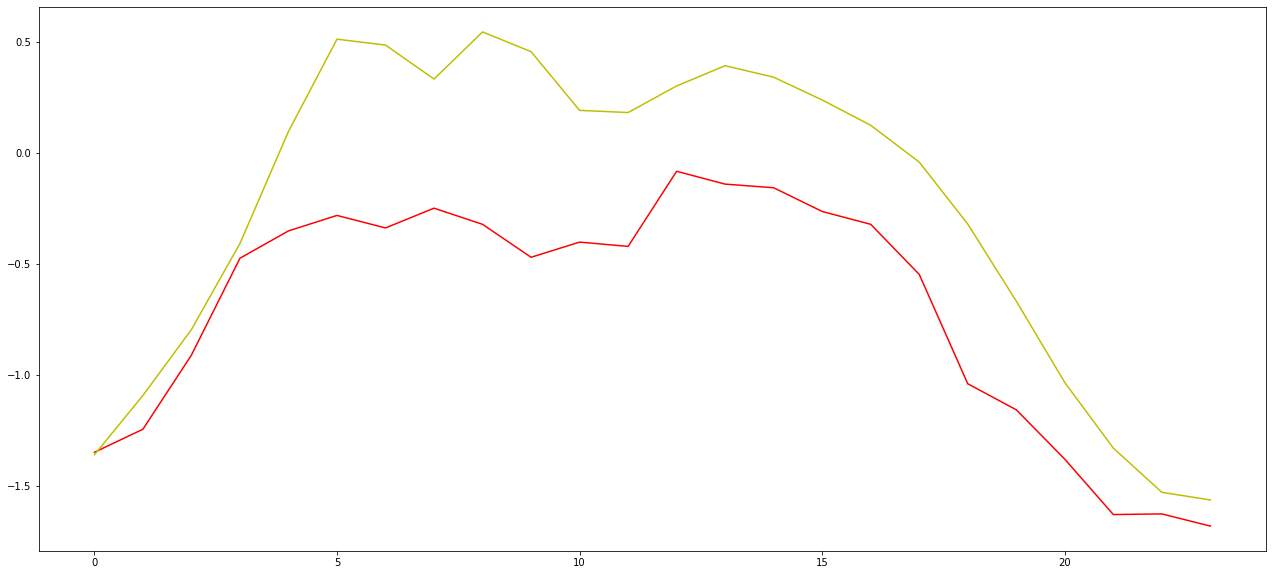

In [23]:
plot(y_true, y_pred)

### This look great. our model has well predicted the trends in the data
### The Red curve is the actual value and the yellow curve is our predicted value and both are pretty much close to each other

## Thank you for visiting 

### Reference : [Analytics vidya project archive](https://www.analyticsvidhya.com/blog/2021/09/web-traffic-forecasting-using-deep-learning/#h2_5)